In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import copy

In [32]:
def g(x): 
    return 4.26*(np.exp(-x)-4*np.exp(-2*x)+3*np.exp(-3*x))

In [33]:
def generate_dataset(min_, max_, sigma,n=1000): 
    x = np.linspace(min_, max_, n)
    y = g(x)
    y += np.random.normal(0, sigma, size=y.shape)
    return x.reshape(-1, 1), y

In [14]:
def plot_results(x, y_true, y_pred, ax=None):
    if ax is None: 
        fig, ax = plt.subplots(figsize=(9, 6))
    ax.scatter(x, y_true, s=0.5, label='True points')
    ax.plot(x, y_pred, label='Estimated', color='red')
    ax.legend()

In [17]:
def count_mse(y_true, y_pred): 
    return ((y_true - y_pred)**2).mean()

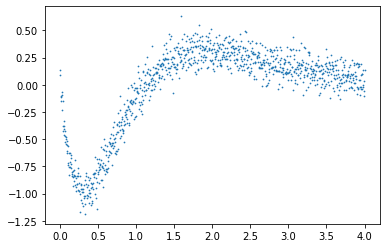

In [36]:
x, y = generate_dataset(0, 4, 0.1)
plt.scatter(x, y, s=0.5)

- Kernel Regression Smoother (in R: function ksmooth),

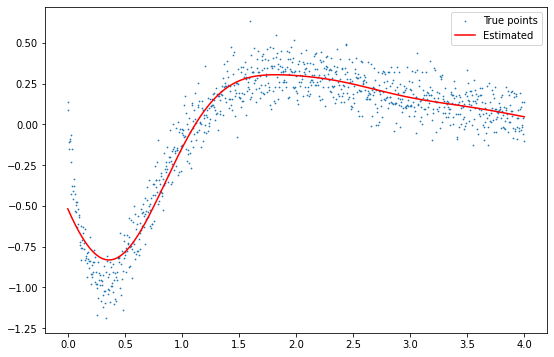

In [37]:
kr = KernelRidge(kernel='rbf').fit(x, y)
y_pred = kr.predict(x)
plot_results(x, y, y_pred)

- Smoothing Spline (in R: function smooth.spline).

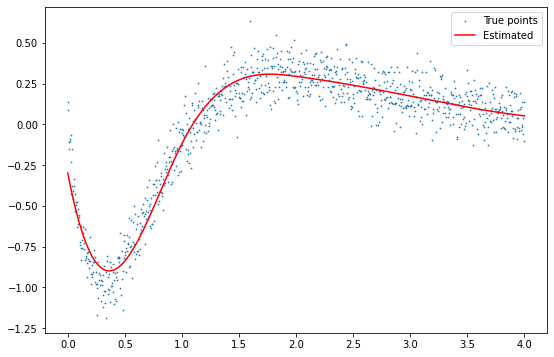

In [38]:
spline = make_pipeline(SplineTransformer(), Ridge(alpha=0.01)).fit(x, y)
y_pred = spline.predict(x)
plot_results(x, y, y_pred)

Text(0.5, 0, 'Sample size')

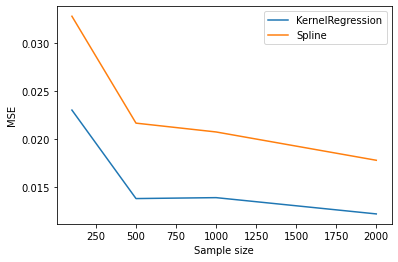

In [39]:
ns = [100, 500, 1000, 2000]
mses_kernel = []
mses_spline = []

for n in ns:
    x, y = generate_dataset(0, 4, 0.1, n)
    y_kernel = KernelRidge(kernel='rbf').fit(x, y).predict(x)
    y_spline = make_pipeline(SplineTransformer(), Ridge()).fit(x, y).predict(x)
    mses_kernel.append(count_mse(y, y_kernel))
    mses_spline.append(count_mse(y, y_spline))
plt.plot(ns, mses_kernel, label='KernelRegression')
plt.plot(ns, mses_spline, label='Spline')
plt.legend()
plt.ylabel('MSE')
plt.xlabel('Sample size')

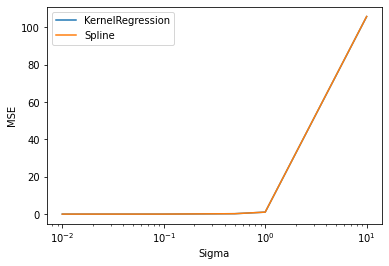

In [40]:
sigmas = [0.01, 0.1, 0.5, 1, 10]
mses_kernel = []
mses_spline = []

for sigma in sigmas:
    x, y = generate_dataset(0, 4, sigma, 1000)
    y_kernel = KernelRidge(kernel='rbf').fit(x, y).predict(x)
    y_spline = make_pipeline(SplineTransformer(), Ridge()).fit(x, y).predict(x)
    mses_kernel.append(count_mse(y, y_kernel))
    mses_spline.append(count_mse(y, y_spline))
plt.plot(sigmas, mses_kernel, label='KernelRegression')
plt.plot(sigmas, mses_spline, label='Spline')
plt.legend()
plt.ylabel('MSE')
plt.xlabel('Sigma')
plt.xscale('log')

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import copy
from pyearth import Earth


In [11]:
def generate_datasets(id_of_dataset, n=1000): 
    x_2_50 = np.random.normal(size=(n, 49))
    e = np.random.normal(0, 0.1, size=(n,))
    if id_of_dataset == 1:
        x_1 = np.random.uniform(0, 4, size=(n, 1))
        y = lambda x: x[:, 0]**0.5  + e 
    elif id_of_dataset == 2:
        x_1 = np.random.uniform(0, 4, size=(n, 1)) 
        y = lambda x: x[:, 0]**2  + e 
    elif id_of_dataset == 3:
        x_1 = np.random.normal(size=(n, 1))
        def y(x):
            x_0 = x[:, 0]
            x_0[x_0 < 0] = 0
            x_1 = x[:, 0] - 1
            x_1[x_1 < 0] = 0
            return x_0 + x_1 + e
            
    elif id_of_dataset == 4:
        x_1 = np.random.uniform(0, 4, size=(n, 1)) 
        y = lambda x: np.sin(x[:, 0])  + e 
    elif id_of_dataset == 5:
        x_1 = np.random.normal(size=(n, 1))
        y = lambda x: (x[:, 0] < 0).astype(np.int32) 
    else: 
        raise ValueError(f"Wrong id_of_dataset: {id_of_dataset}")
    
    x = np.concatenate([np.array(sorted(x_1)), x_2_50], axis=1)
    y = y(x)
    return x, y

In [12]:
[None for i in range(1, 6) if generate_datasets(i)]

[None, None, None, None, None]

c:\users\krystian kurek\.conda\envs\mgr\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
c:\users\krystian kurek\.conda\envs\mgr\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
c:\users\krystian kurek\.conda\envs\mgr\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N

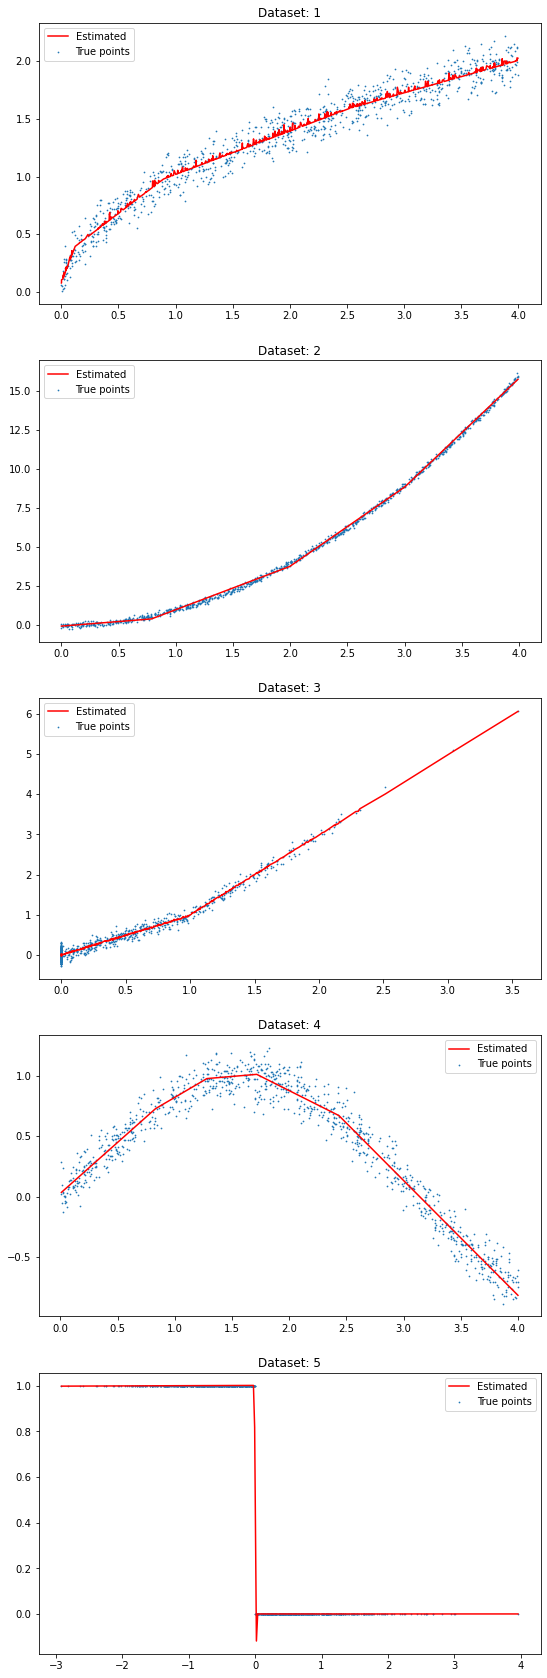

In [15]:
fig, axs = plt.subplots(nrows=5, figsize=(9, 6*5))
for dataset_id in range(1, 6):
    x, y = generate_datasets(dataset_id)
    model = Earth()
    model.fit(x,y)
    y_pred = model.predict(x)
    plot_results(x[:, 0], y, y_pred, ax=axs[dataset_id-1])
    axs[dataset_id - 1].set_title(f'Dataset: {dataset_id}')

In [3]:
from sklearn.datasets import load_diabetes

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [34]:
x = load_diabetes(as_frame=True)['data'].values
y = load_diabetes(as_frame=True)['target'].values
y = (y -np.mean(y))/np.std(y)

c:\users\krystian kurek\.conda\envs\mgr\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
c:\users\krystian kurek\.conda\envs\mgr\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


<BarContainer object of 3 artists>

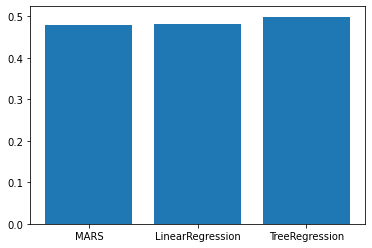

In [35]:
models = {
    'MARS': Earth(),  
    'LinearRegression': LinearRegression(), 
    'TreeRegression': DecisionTreeRegressor(max_depth=3)
}

model_names = []
mses = []
for model_name, model in models.items():
    model.fit(x,y)
    y_pred = model.predict(x)
    mses.append(count_mse(y, y_pred))
    model_names.append(model_name)
plt.bar(model_names, mses)